<a href="https://colab.research.google.com/github/upwind1993/Numerical-Analysis/blob/main/6%EC%9E%A5/NR_Ex_6_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import numpy as np
import matplotlib.pyplot as plt

def newtraph_verbose(f, fp, x0, Ea=1e-7, maxit=30, true=None):
    errors = []
    print(f"{'i':>2} {'x_i':>12} {'f(x_i)':>12} {'f\'(x_i)':>12} {'x_{i+1}':>12} {'e_t':>12}")
    print("-"*66)

    for i in range(maxit):
        fx = f(x0)
        fpx = fp(x0)
        x1 = x0 - fx/fpx
        et = abs((true - x1)/true) if true is not None else np.nan
        errors.append(et)

        print(f"{i:2d} {x0:12.8f} {fx:12.8e} {fpx:12.8f} {x1:12.8f} {et:12.8e}")

        if abs((x1-x0)/x1) < Ea:
            break
        x0 = x1

    return x1, f(x1), errors, i+1

def plot_convergence(errors):
    plt.semilogy(range(1, len(errors)+1), errors, marker='o')
    plt.xlabel("Iteration")
    plt.ylabel("True Relative Error (log scale)")
    plt.title("Convergence of Newton-Raphson")
    plt.grid(True, which="both", ls="--")
    plt.show()



 i          x_i       f(x_i)      f'(x_i)      x_{i+1}          e_t
------------------------------------------------------------------
 0   0.00000000 -1.00000000e+00   2.00000000   0.50000000 1.18388583e-01
 1   0.50000000 -1.06530660e-01   1.60653066   0.56631100 1.46750782e-03
 2   0.56631100 -1.30450981e-03   1.56761551   0.56714317 2.21063925e-07
 3   0.56714317 -1.96480472e-07   1.56714336   0.56714329 5.08968353e-15
 4   0.56714329 -4.44089210e-15   1.56714329   0.56714329 0.00000000e+00

근 추정값 = 0.567143290409784
f(근) = 1.1102230246251565e-16
총 반복 횟수 = 5


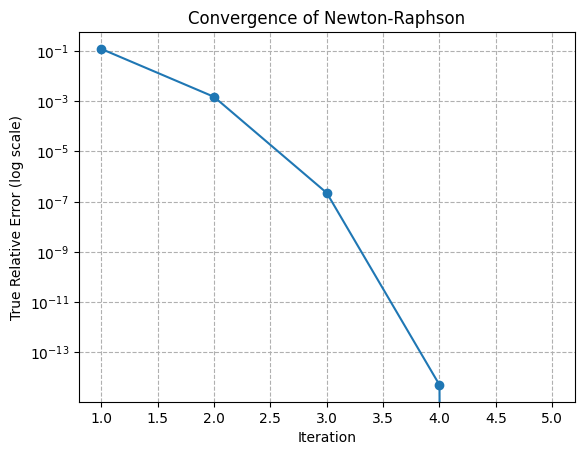

In [9]:
# ---- f(x), f'(x) 정의 ----
f = lambda x: x - np.exp(-x)
fp = lambda x: 1 + np.exp(-x)

# ---- 실행 ----
true_root = 0.567143290409784
root, fval, errors, iters = newtraph_verbose(f, fp, x0=0.0, true=true_root)

print("\n근 추정값 =", root)
print("f(근) =", fval)
print("총 반복 횟수 =", iters)

plot_convergence(errors)
